Task 1: Import the adult dataset from the ucimlrepo

In [28]:
#pip install ucimlrepo

In [29]:
#pip install numpy

In [30]:
#pip install pandas

In [31]:
#pip install matplotlib

In [32]:
#pip install scikit-learn

In [33]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [35]:
#from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
#adult = fetch_ucirepo(id=2) 
#Raw content URL for adult-all.txt
url = "https://raw.githubusercontent.com/rubaomari/data/main/adult/adult-all.txt"

#Specify the delimiter (assuming it's a tab-separated file)
delimiter = ', '

#Read the data into a DataFrame
adult = pd.read_csv(url, delimiter=delimiter)

#Let's create a backup copy of the dataset
adult_backup = adult.copy()

features = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
            'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']


C:\Users\hasti\AppData\Local\Temp\ipykernel_6236\3185721443.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  adult = pd.read_csv(url, delimiter=delimiter)


In [36]:
features = pd.Series(features)
adult_backup.columns = features
adult_backup

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48837,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48838,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48839,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [37]:
# data (as pandas dataframes) 
X = adult_backup.iloc[:,:-1]
y =adult_backup.iloc[:,-1:]
#y = pd.DataFrame(y)
print(y.info())
# metadata 
#print(adult_backup.metadata) 
  
# variable information 
#print(adult_backup.variables) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  48841 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB
None


Task 2: Take a quick look at the data structure (i.e., X) using .head(), .info(), .describe(), and .shape.

In [38]:
# use head() to look at the first 5 rows
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States


In [39]:
# use info() to get a quick description of the data
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48841 non-null  int64 
 1   workclass       48841 non-null  object
 2   fnlwgt          48841 non-null  int64 
 3   education       48841 non-null  object
 4   education-num   48841 non-null  int64 
 5   marital-status  48841 non-null  object
 6   occupation      48841 non-null  object
 7   relationship    48841 non-null  object
 8   race            48841 non-null  object
 9   sex             48841 non-null  object
 10  capital-gain    48841 non-null  int64 
 11  capital-loss    48841 non-null  int64 
 12  hours-per-week  48841 non-null  int64 
 13  native-country  48841 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [40]:
#use .describe() method to see a summary of the numerical attributes
X.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48841.000000,4.884100e+04,48841.000000,48841.000000,48841.000000,48841.000000
mean,38.643578,1.896664e+05,10.078029,1079.045208,87.504105,40.422391
std,13.710650,1.056039e+05,2.570965,7452.093700,403.008483,12.391571
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781470e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376460e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [41]:
X.shape

(48841, 14)

Task 2.1: Plot a histogram of the data.

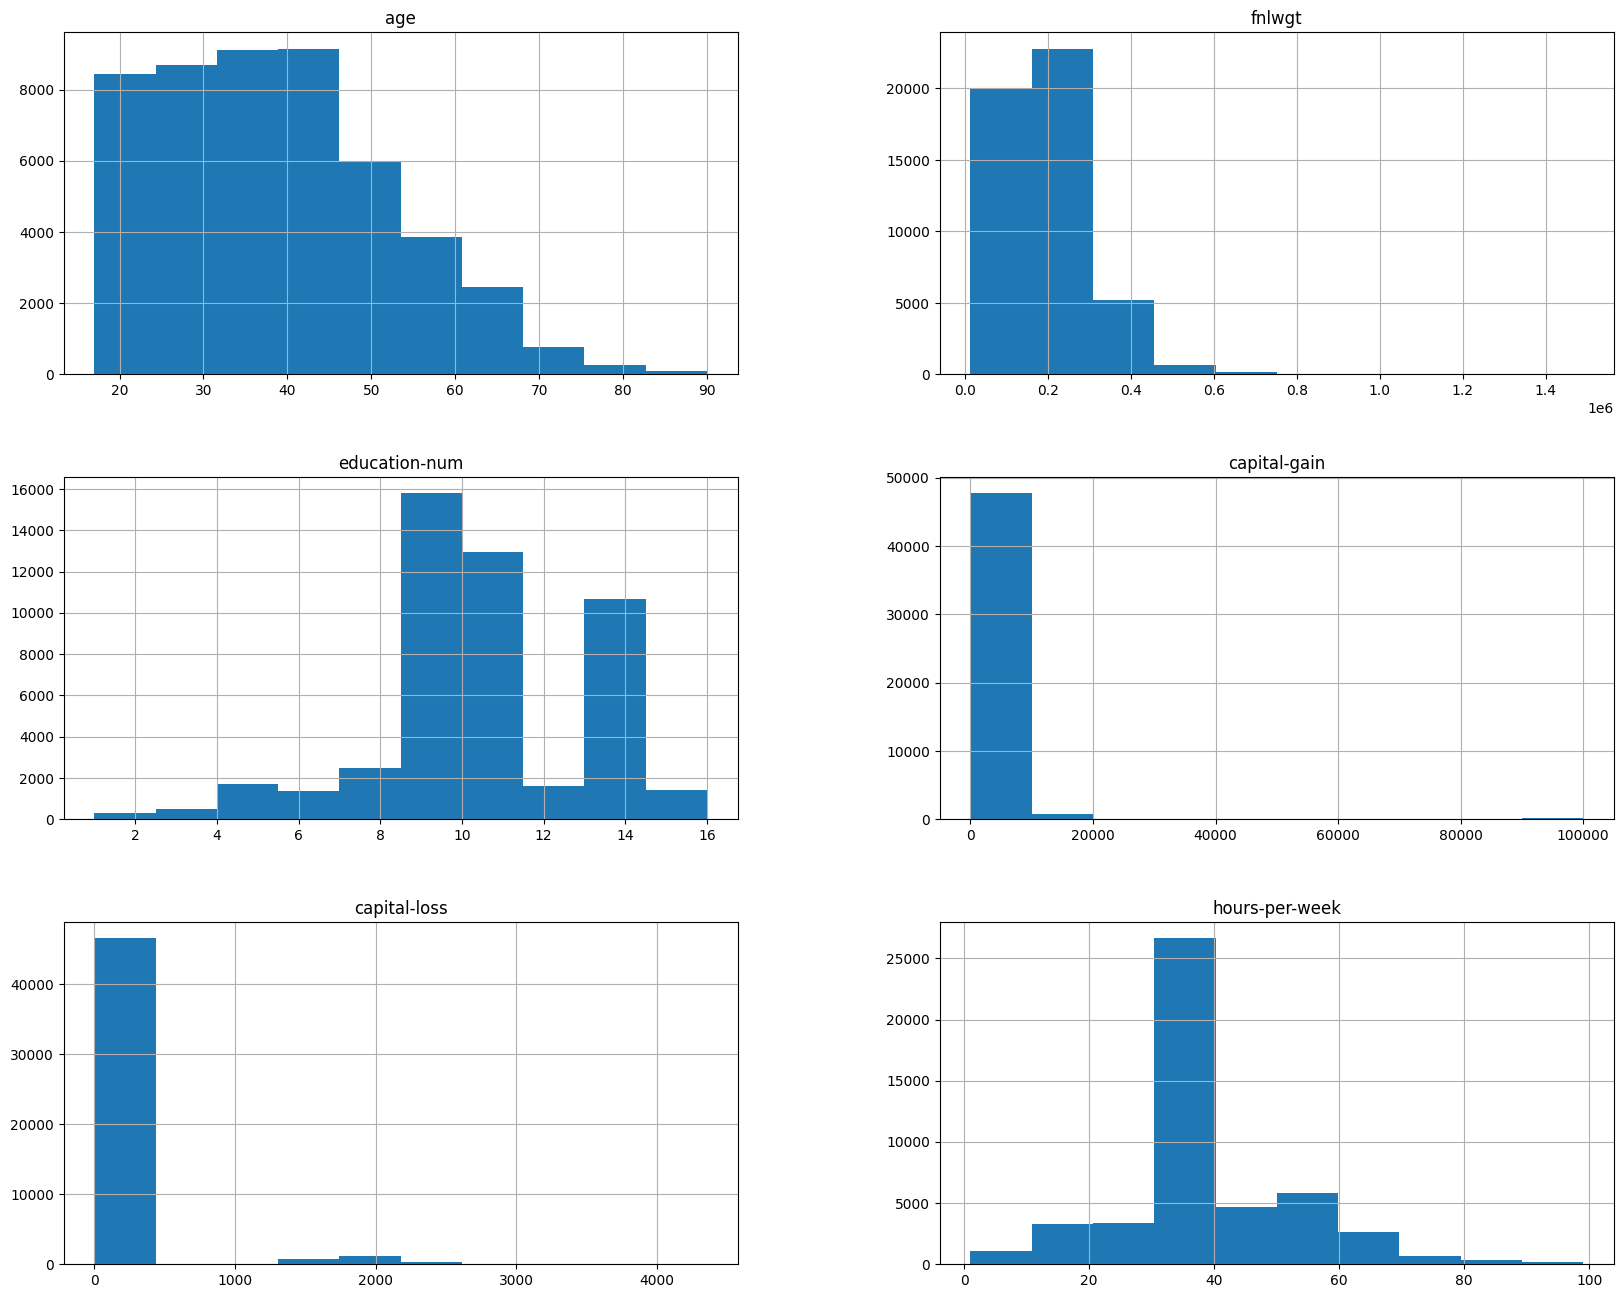

In [42]:
# plotting a histogram of the data using hist()
X.hist(figsize=(20, 16))
plt.show()

Task 3: There are missing values in this dataset that are entered as ?, check for the number of these missing values.

In [43]:
# counting the number of the missing elements denoted by ?
X[X == '?'].count()


age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
dtype: int64

In [44]:
# replacing the ? with null value and showing the data using info()
X = X.replace('?', np.nan)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48841 non-null  int64 
 1   workclass       46042 non-null  object
 2   fnlwgt          48841 non-null  int64 
 3   education       48841 non-null  object
 4   education-num   48841 non-null  int64 
 5   marital-status  48841 non-null  object
 6   occupation      46032 non-null  object
 7   relationship    48841 non-null  object
 8   race            48841 non-null  object
 9   sex             48841 non-null  object
 10  capital-gain    48841 non-null  int64 
 11  capital-loss    48841 non-null  int64 
 12  hours-per-week  48841 non-null  int64 
 13  native-country  47984 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


Task 5: Create and apply a preprocessing pipeline to:
1. Fill in the missing numerical values with the mean using a SimpleImputer.
2. Scale the numerical columns using StandardScaler. Do not scale the target.
3. Fill in the missing categorical values with the most_frequent value using SimpleImputer.
4. Encode the categorical columns using OneHotEncoder. Do not encode the target.
- Display your pipeline.
- Print X_prepared.shape.
Tips:
- If you are facing an issue with the preprocessing pipeline producing a sparse matrix, pass a “sparse_output=False” option to the OneHotEncoder in the pipeline, i.e., OneHotEncoder(sparse_output=False)
- X_prepared.shape should be (48842, 105) at this point.

In [45]:
# Create the cat and num columns
# Get a list of column names from the 'X' DataFrame that are of numerical data types.
# Get a list of column names from the 'X' DataFrame that are not of numerical data types.

num_cols = X.select_dtypes(include='number').columns.to_list()
cat_cols = X.select_dtypes(exclude='number').columns.to_list()

print(num_cols)

print(cat_cols)

# Create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse_output=False))

# Use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )


['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [46]:
# showing the numerical columns
num_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [47]:
# Show the pipeline
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'fnlwgt', 'education-num',
                                  'capital-gain', 'capital-loss',
                                  'hours-per-week']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['workclass', 'education', 'marital-status',
                                  'occupation', 'relationship', 'race', 'sex',
                                  'native-country'])])

In [48]:
# applying the pipeline to the dataset
X_prepared = preprocessing.fit_transform(X)
X_prepared.shape
X_prepared = pd.DataFrame(data=X_prepared, columns=preprocessing.get_feature_names_out())

Task 6: Check the target value_counts.

In [49]:
# using value_count() to get the count of differnet targets
y.value_counts()

income
<=50K     24719
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

Task 7: Remove the period at the end of the >50K. and <=50K. i.e., replace all instances that are <=50K. with <=50K , and replace all the instances that are >50K. with >50K

In [50]:
#replacing the values in the target data with the desired value
#Y_Target = y.copy()
#reformate the data in the target
y.replace('>50K.' ,'>50K', inplace=True)
y.replace('<=50K.','<=50K', inplace=True)
#show the answer
y.value_counts()


income
<=50K     37154
>50K      11687
Name: count, dtype: int64

Task 8: Split the data into 80% training set and 20% testing set, print the shape of X_train, X_test, y_train, y_test in one command.

In [51]:
# spliting the data by choosing 20% of the data be the test data and the rest training set (80%)
print(X_prepared.info())
print(y.info())
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Columns: 105 entries, num__age to cat__native-country_Yugoslavia
dtypes: float64(105)
memory usage: 39.1 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  48841 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB
None
(39072, 105) (39072, 1) (9769, 105) (9769, 1)


Task 9: Train a svm model (svc) to predict if the income of the adult exceeds 50K on the training set using: kernel = poly, gamma = 1, and C =0.1. Call your model model_svm.

In [52]:
# using the SVC function traing the data with Polynomial model, gamma = 1, C = 0.1
model_svm = SVC(kernel='poly', C=0.1, gamma=1)
print(X_train.info())
model_svm.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())

<class 'pandas.core.frame.DataFrame'>
Index: 39072 entries, 31092 to 15795
Columns: 105 entries, num__age to cat__native-country_Yugoslavia
dtypes: float64(105)
memory usage: 31.6 MB
None


SVC(C=0.1, gamma=1, kernel='poly')

Task 9.1: Test your model on the X_Test, and report the classification_report on the y_test and y_predict.

In [53]:
# Testing the model
y_predict = model_svm.predict(X_test)
print(f'classification_report for C = 1')
print (classification_report(y_test, y_predict))

classification_report for C = 1
              precision    recall  f1-score   support

       <=50K       0.88      0.89      0.88      7464
        >50K       0.62      0.60      0.61      2305

    accuracy                           0.82      9769
   macro avg       0.75      0.74      0.75      9769
weighted avg       0.82      0.82      0.82      9769



Task 9.2: Display the confusion matrix of your test results using ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

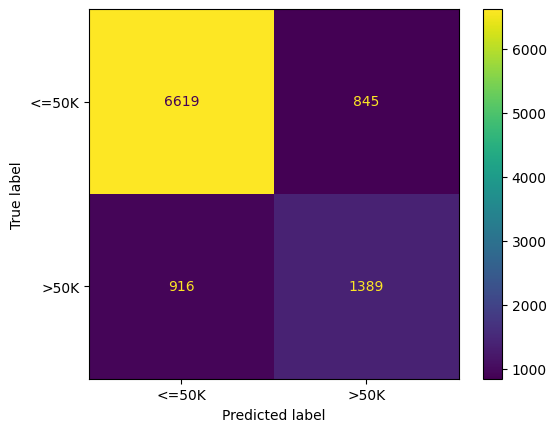

In [54]:
#Displaying the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

Task 10: Use GridSearchCV to find the best value of kernel, gamma, and C

Task 10.1: Split the dataset into 60% training, 20% validation, and 20% testing. Use the code below to perform the split:

In [57]:
# splitting the data set into 40% validaton set and 60% training set
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X_prepared, y, test_size=0.4, random_state=42)

# splitting the training dataset (the initial  40%) into half, validation and test set (each 20% of the original dataset)
X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(29304, 105) (29304, 1) (9768, 105) (9768, 1) (9769, 105) (9769, 1)


Task 10.2: Use the below code snippet to pass the following hyperparameters for the GridSearchCV to find the best ones:

In [58]:
# code author luisguiserrano 

from sklearn.model_selection import GridSearchCV

svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1 , 10],
                  'gamma': [0.01, 1, 10]
                }
svm = SVC()
svm_gs = GridSearchCV(estimator = svm,
                      param_grid = svm_parameters)
svm_gs.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())

svm_winner = svm_gs.best_estimator_
print(svm_winner)
print(svm_winner.score(X_validation, y_validation))


SVC(C=1, gamma=0.01)
0.8502252252252253


Task 10.2: Check the svm winner parameters using svm_winner

In [59]:
# printing the vm number
svm_winner

SVC(C=1, gamma=0.01)